#Goal of lab:
1. Generate and manipulate signals
2. Visualize signals
3. Save signals to listen to them 

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from mpl_toolkits.mplot3d import Axes3D #For 3d plots
#import winsound
#from mlp

In [38]:
2/3.0

0.6666666666666666

## Q1: Sampling of a sinusoid

In [181]:
'''Auxiliary functions'''
def float_to_16BitInt(yFloat):
    y_16bit_int = [int(s*32767) for s in yFloat]
    return np.array(y_16bit_int, dtype= 'int16')

def int16bit_to_float(y_16bit_int):
    yFloat = [float(s/32767.0) for s in y_16bit_int]
    return np.array(yFloat, dtype = 'float')
    

'''Create continous time sinusiod'''
def continousTimeSinusoid(A, signal_freq, phase_phi, freq_sampling, start_time, end_time):
    '''Output: sample_instant, time_instant, amplitude '''
    
    #how do we generate a continous time signal -> this won't be possible as that would mean infinite values
    #this is just the cos / sine function with some phase shift
    #Acos(2*pi*f*t + phi)
    #so we generate the samples we need based on sampling frequency
    
    time_steps = np.arange(start_time, end_time, 1.0/freq_sampling) #Step size in time duration = 1/sampling frequency
    time_steps = time_steps.reshape(time_steps.shape[0],1)
    sample_step = np.arange(0,time_steps.shape[0]).reshape(time_steps.shape[0],1)
    cont_signal = A*np.cos(2*np.pi*signal_freq*time_steps + phase_phi)
    concatenated_tensor = np.concatenate((sample_step, time_steps, cont_signal), axis =1)
    return concatenated_tensor

def sketch_signal(x,y, x_label="Sample time", y_label="Sample amplitude", scatter = True, grid = True):
    plt.figure(1)
   
    plt.plot(x,y)
    if(scatter):
        plt.scatter(x,y)
    plt.title("Sampled Signal")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if(grid):
        plt.grid()
    #plt.show()
    return plt

In [182]:
q3_1 = continousTimeSinusoid(10, 1000, 0, 16000, 0, 0.5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

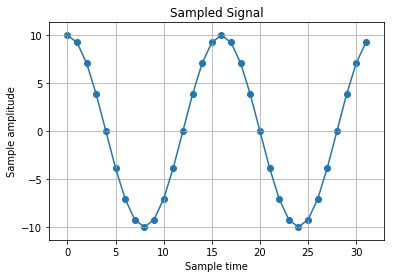

In [183]:
sketch_signal(q3_1[:32,0],q3_1[:32,2], scatter=True)

In [85]:
q3_1[:10,0]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

## Q2: DTMF Signal

In [86]:
def gen_DTMFseq(code, freqs, durTone):
    '''
    A DTMF sequence consists of two frequencies -> dual tone multi frequency
    '''

## Q4: Discrete time polar signal

In [89]:
1j**2

(-1+0j)

In [ ]:
y1 = np.multiply(np.power(A, n), np.exp(1j * w1 * n))

In [184]:
def gen_discrete_time_polar_signal(A, omega, phase_shift, start_sample_n, end_sample_n, breakdown_by_sinusoids_as_well = False):
    '''(Ae^(i(angle)))^n
    
    Output: [[complex sample, complex rep]] 
    '''
    samples = np.arange(start_sample_n, end_sample_n)
    samples = samples.reshape(samples.shape[0],1)
    
    magnitude = np.power(A, samples)
    
    signal = np.multiply(magnitude, np.exp(1j*(omega*samples + phase_shift)))
    
    concatentated_tensor = np.concatenate((samples, signal), axis =1)
    
    if(breakdown_by_sinusoids_as_well):
        exp_real_val = magnitude*np.cos(omega*samples + phase_shift)#cosine
        exp_img_val = magnitude*np.sin(omega*samples + phase_shift) #sin

        assert exp_real_val[len(exp_real_val)-5]== signal[len(exp_real_val)-5].real
        assert exp_img_val[len(exp_real_val)-5] == signal[len(exp_real_val)-5].imag #This can fail for different precisions
        concatentated_tensor_using_sinusoidbreakdown = np.concatenate((samples, exp_real_val, exp_img_val), axis =1)
        return concatentated_tensor, concatentated_tensor_using_sinusoidbreakdown
        
    #coordinate_tuple = n, magnitude*exp_real_val, magnitude*exp_img_val
    return concatentated_tensor

def plot_2d_dtps(sample_steps, complex_rep = None, cos_thet= None, sin_thet = None, fig_size = (10,8)):
    plt.figure(2, figsize = fig_size)
    num_samples = len(sample_steps)
    
    if(complex_rep.shape[0]>0):
        plt.plot(sample_steps, complex_rep[0:num_samples].real, 'r--o')
        plt.plot(sample_steps, complex_rep[0:num_samples].imag, 'g--o')
    elif(cos_thet.shape[0]>0 and sin_thet.shape[0]>0):
        plt.plot(sample_steps, cos_thet[0:num_samples], 'r--o')
        plt.plot(sample_steps, sin_thet[0:num_samples], 'g--o')
    plt.xlabel('sample index')
    plt.ylabel('y[n]')
    plt.title("Complex exponential (read=real; green=imag)")
    plt.grid()
    return plt

def plot_polar_dtps(sample_steps, complex_rep = None, fig_size = (10,8)):
    plt.figure(3, figsize= fig_size)
    num_samples = len(sample_steps)
    for complex_var in complex_rep:
        plt.polar([0, np.angle(complex_var)],[0, np.abs(complex_var)], marker = 'o')
        
    plt.title("Polar plot showing phasors at n = 0...{}".format(num_samples))
    return plt

def plot_3d_complex_plane(sample_steps, complex_rep = None, fig_size = (10,8)):
    plt.rcParams['legend.fontsize'] = 10
    fig = plt.figure(4, figsize=fig_size)
    num_samples = len(sample_steps)
    ax = fig.gca(projection = '3d') #create 3d axis for complex imag
    real_val = complex_rep[0:num_samples].real
    imag_val = complex_rep[0:num_samples].imag
    ax.plot(sample_steps, real_val, imag_val, label = 'complex_exp_phasor')
    ax.scatter(sample_steps, real_val, imag_val, c ='r', marker = 'o')
    ax.set_xlabel('sample n')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.legend()
    return plt

In [185]:
complex_vars = gen_discrete_time_polar_signal(0.95, np.pi/18, 0, 0, 50, False)

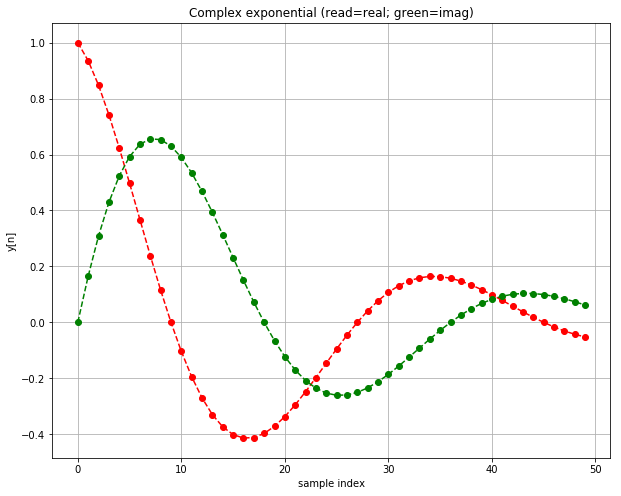

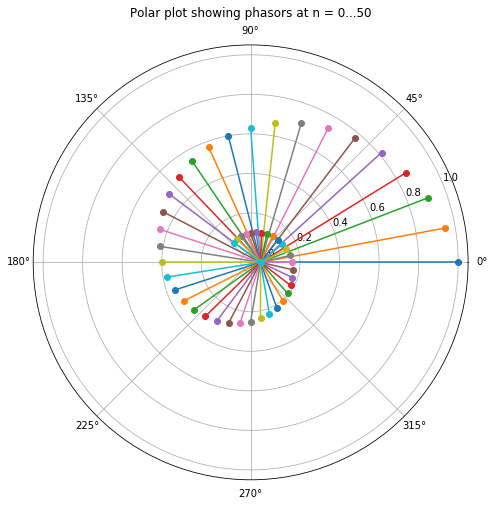

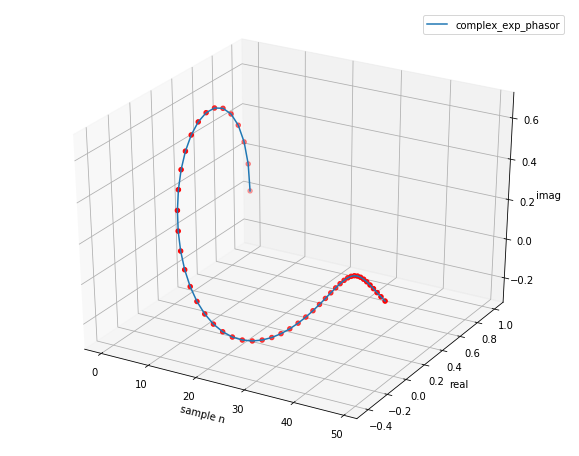

In [186]:
complex_to_real_int = lambda x: map(lambda l: int(l.real), x)
samples_in_int = complex_to_real_int(complex_vars[: , 0])
plt2d = plot_2d_dtps(samples_in_int, complex_vars[:,1])
plt_polar = plot_polar_dtps(samples_in_int, complex_vars[:,1])
plt_3d = plot_3d_complex_plane(samples_in_int, complex_vars[:,1])

In [29]:
def gen_W_signal(k, start_n, end_n):
    samples = np.arange(start_n, end_n)
    N = samples.shape[0]
    samples = samples.reshape(N,1)
    exp_real_val = np.cos(2*np.pi*k*samples/N)
    exp_img_val = np.sin(2*np.pi*k*samples/N)
    concatenated_tensor = np.concatenate((samples, exp_real_val, exp_img_val), axis =1)
    return concatenated_tensor

In [30]:
gen_W_signal(1, 0, 16)

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   9.23879533e-01,   3.82683432e-01],
       [  2.00000000e+00,   7.07106781e-01,   7.07106781e-01],
       [  3.00000000e+00,   3.82683432e-01,   9.23879533e-01],
       [  4.00000000e+00,   6.12323400e-17,   1.00000000e+00],
       [  5.00000000e+00,  -3.82683432e-01,   9.23879533e-01],
       [  6.00000000e+00,  -7.07106781e-01,   7.07106781e-01],
       [  7.00000000e+00,  -9.23879533e-01,   3.82683432e-01],
       [  8.00000000e+00,  -1.00000000e+00,   1.22464680e-16],
       [  9.00000000e+00,  -9.23879533e-01,  -3.82683432e-01],
       [  1.00000000e+01,  -7.07106781e-01,  -7.07106781e-01],
       [  1.10000000e+01,  -3.82683432e-01,  -9.23879533e-01],
       [  1.20000000e+01,  -1.83697020e-16,  -1.00000000e+00],
       [  1.30000000e+01,   3.82683432e-01,  -9.23879533e-01],
       [  1.40000000e+01,   7.07106781e-01,  -7.07106781e-01],
       [  1.50000000e+01,   9.23879533e-01,  -3.8268343